<a href="https://colab.research.google.com/github/shearere2/fall_2024_transit/blob/main/TransitDependentGroupsWeiEtAl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell is an efficient combination of all of the other cells in this file. See the other files for more understanding of how this cell works.

In [1]:
import pandas as pd
import geopandas as gpd

# Tracts geodataframe
bg = gpd.read_file('/content/Allegheny_County_Census_Block_Groups_2020.zip')
tr = gpd.read_file('/content/Allegheny_County_Census_Tracts_2020.zip')

pop = bg.groupby('TRACTCE20').apply(lambda x: sum(x['POP20']), include_groups=False)
housing = bg.groupby('TRACTCE20').apply(lambda x: sum(x['HOUSING20']), include_groups=False)

tr.set_index('TRACTCE', inplace=True)
tr['population'] = pop
tr['housing'] = housing

homes = tr

col_titles = [[['Geography', # Age
                'Geographic Area Name', 'Estimate!!Total!!Total population',
                'Estimate!!Total!!Total population!!SELECTED AGE CATEGORIES!!5 to 14 years',
                'Margin of Error!!Total!!Total population!!SELECTED AGE CATEGORIES!!5 to 14 years',
                'Estimate!!Total!!Total population!!SELECTED AGE CATEGORIES!!65 years and over',
                'Margin of Error!!Total!!Total population!!SELECTED AGE CATEGORIES!!65 years and over'],
                 ['Geography', 'Geographic Area Name', 'age_population',
                  '5to14_population', '5to14_margoferr', 'o65_population','o65_margoferr']],
                   [['Geographic Area Name', # Vehicles
                     'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!No vehicle available',
                     'Margin of Error!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!No vehicle available',
                     'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!1 vehicle available',
                     'Margin of Error!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!1 vehicle available',
                     'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!2 vehicles available',
                     'Margin of Error!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!2 vehicles available',
                     'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!3 or more vehicles available',
                     'Margin of Error!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!3 or more vehicles available'],
                      ['Geographic Area Name', 'over16_0vechicle_count', 'over16_0vehicle_margoferr',
                      'over16_1vehicle_count', 'over16_1vehicle_margoferr',
                      'over16_2vehicle_count', 'over16_2vehicle_margoferr',
                      'over16_3vehicle_count', 'over16_3vehicle_margoferr']],
                       [['Geographic Area Name', # Unemployment
                         'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over',
                         'Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over',
                         'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed',
                         'Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed'],
                          ['Geographic Area Name', 'unemp_sample_population', 'unemp_sample_margoferr',
                           'unemployed_population', 'unemployed_margoferr'], ['unemployment_rate']],
                            [['Geographic Area Name', # Disability
                              'Estimate!!Total!!Total civilian noninstitutionalized population',
                              'Margin of Error!!Total!!Total civilian noninstitutionalized population',
                              'Estimate!!With a disability!!Total civilian noninstitutionalized population',
                              'Margin of Error!!With a disability!!Total civilian noninstitutionalized population'],
                               ['Geographic Area Name', 'noninst_population', 'noninst_margoferr',
                                'population_below_poverty', 'below_poverty_margoferr'], ['disability_rate']],
                                 [['Geographic Area Name', # Poverty
                                   'Estimate!!Total!!Population for whom poverty status is determined',
                                   'Margin of Error!!Total!!Population for whom poverty status is determined',
                                   'Estimate!!Below poverty level!!Population for whom poverty status is determined',
                                   'Margin of Error!!Below poverty level!!Population for whom poverty status is determined'],
                                    ['Geographic Area Name', 'pov_sample_population', 'pov_sample_margoferr',
                                     'population_below_poverty', 'below_poverty_margoferr'], ['poverty_rate']],
                                      [['Geographic Area Name', # Race
                                      'Estimate!!RACE!!Total population',
                                      'Margin of Error!!RACE!!Total population',
                                      'Estimate!!RACE!!Total population!!One race!!White',
                                      'Margin of Error!!RACE!!Total population!!One race!!White'],
                                       ['Geographic Area Name', 'race_population', 'race_margoferr',
                                        'white_population', 'white_margoferr'], ['percent_nonwhite']]]

i = 0
for df in [pd.read_csv('age_data.csv'), pd.read_csv('car_data.csv'),
           pd.read_csv('unemployment_data.csv'), pd.read_csv('disability_data.csv'),
            pd.read_csv('poverty_data.csv'), pd.read_csv('demographic_data.csv')]:

  df.columns = list(df.iloc[0])
  df = df[2:]

  df = df[col_titles[i][0]]
  df.columns = col_titles[i][1]

  if i == 5: # Specific method to race group
    df['nonwhite_population'] = df['race_population'].astype(int) - df['white_population'].astype(int)

  df['NAME'] = df['Geographic Area Name'].apply(lambda x: x.split(',')[0].split(' ')[-1])
  if i == 0 : homes = pd.merge(left=homes, right=df, on='NAME')
  else: homes = pd.merge(left=homes, right=df.drop(columns=['Geographic Area Name']), on='NAME')

  if i in [2, 3, 4]:
    def temp_func1(row):
      try:
        return int(row[col_titles[i][2][4]]) / int(row[col_titles[i][2][2]])
      except:
        return 0.0
      homes[col_titles[i][3][0]] = homes.apply(lambda x: temp_func1(x), axis=1)
  elif i == 5:
    def temp_func2(row):
      try:
        return 1 - int(row['white_population']) / int(row['race_population'])
      except:
        return 0.0
      homes[col_titles[i][3][0]] = homes.apply(lambda x: temp_func2(x), axis=1)

  i += 1

homes

,FID,STATEFP,COUNTYFP,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,below_poverty_margoferr_x,pov_sample_population,pov_sample_margoferr,population_below_poverty_y,below_poverty_margoferr_y,race_population,race_margoferr,white_population,white_margoferr,nonwhite_population
0,1,42,003,42003565300,1400000US42003565300,5653,Census Tract 5653,G5020,S,6565373,...,56,1256,366,339,353,1256,366,1167,357,89
1,2,42,003,42003458002,1400000US42003458002,4580.02,Census Tract 4580.02,G5020,S,17643972,...,197,4208,325,109,88,4208,325,3937,367,271
2,3,42,003,42003458001,1400000US42003458001,4580.01,Census Tract 4580.01,G5020,S,17615721,...,145,3979,326,176,110,3979,326,3668,335,311
3,4,42,003,42003101900,1400000US42003101900,1019,Census Tract 1019,G5020,S,857102,...,112,2382,332,677,302,2382,332,585,148,1797
4,5,42,003,42003120900,1400000US42003120900,1209,Census Tract 1209,G5020,S,1153119,...,134,1432,201,608,207,1564,215,204,110,1360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,42,003,42003475301,1400000US42003475301,4753.01,Census Tract 4753.01,G5020,S,3387769,...,289,4642,838,169,117,4642,838,4268,864,374
390,391,42,003,42003495000,1400000US42003495000,4950,Census Tract 4950,G5020,S,49019304,...,249,3290,15,126,61,3290,15,3030,148,260
391,392,42,003,42003521302,1400000US42003521302,5213.02,Census Tract 5213.02,G5020,S,7972525,...,236,4170,639,255,141,4311,650,3072,651,1239
392,393,42,003,42003523701,1400000US42003523701,5237.01,Census Tract 5237.01,G5020,S,6548443,...,157,4026,471,477,286,4026,471,3169,431,857


In [2]:
import pandas as pd
import geopandas as gpd

# Tracts geodataframe
bg = gpd.read_file('/content/Allegheny_County_Census_Block_Groups_2020.zip')
tr = gpd.read_file('/content/Allegheny_County_Census_Tracts_2020.zip')

pop = bg.groupby('TRACTCE20').apply(lambda x: sum(x['POP20']), include_groups=False)
housing = bg.groupby('TRACTCE20').apply(lambda x: sum(x['HOUSING20']), include_groups=False)

tr.set_index('TRACTCE', inplace=True)
tr['population'] = pop
tr['housing'] = housing

homes = tr

Population aged 5-14 (satisfies age 6-12 transit-dependence group)

Population aged 65+ (satisfies age 65+ transit-dependence group)

In [3]:
df = pd.read_csv('/content/age_data.csv')
df.columns = list(df.iloc[0])
df = df[2:]

df = df[['Geography', 'Geographic Area Name', 'Estimate!!Total!!Total population',
     'Estimate!!Total!!Total population!!SELECTED AGE CATEGORIES!!5 to 14 years',
     'Margin of Error!!Total!!Total population!!SELECTED AGE CATEGORIES!!5 to 14 years',
     'Estimate!!Total!!Total population!!SELECTED AGE CATEGORIES!!65 years and over',
     'Margin of Error!!Total!!Total population!!SELECTED AGE CATEGORIES!!65 years and over']]

df.columns = ['Geography', 'Geographic Area Name', 'age_population',
              '5to14_population', '5to14_margoferr', 'o65_population',
              'o65_margoferr']

df['NAME'] = df['Geographic Area Name'].apply(lambda x: x.split(',')[0].split(' ')[-1])

homes = pd.merge(left=homes, right=df, on='NAME')
homes

,FID,STATEFP,COUNTYFP,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,geometry,population,housing,Geography,Geographic Area Name,age_population,5to14_population,5to14_margoferr,o65_population,o65_margoferr
0,1,42,003,42003565300,1400000US42003565300,5653,Census Tract 5653,G5020,S,6565373,...,"POLYGON ((1350036.132 397597.116, 1350099.159 ...",1238,579,1400000US42003565300,"Census Tract 5653, Allegheny County, Pennsylvania",1256,132,29,189,54
1,2,42,003,42003458002,1400000US42003458002,4580.02,Census Tract 4580.02,G5020,S,17643972,...,"POLYGON ((1294986.269 398702.066, 1295022.896 ...",4602,2070,1400000US42003458002,"Census Tract 4580.02, Allegheny County, Pennsy...",4208,402,138,1212,331
2,3,42,003,42003458001,1400000US42003458001,4580.01,Census Tract 4580.01,G5020,S,17615721,...,"POLYGON ((1294484.894 394691.368, 1294508.457 ...",4333,2119,1400000US42003458001,"Census Tract 4580.01, Allegheny County, Pennsy...",3979,381,175,888,198
3,4,42,003,42003101900,1400000US42003101900,1019,Census Tract 1019,G5020,S,857102,...,"POLYGON ((1357193.652 421144.954, 1357205.823 ...",2432,1201,1400000US42003101900,"Census Tract 1019, Allegheny County, Pennsylvania",2382,301,109,327,82
4,5,42,003,42003120900,1400000US42003120900,1209,Census Tract 1209,G5020,S,1153119,...,"POLYGON ((1364831.628 419740.38, 1364856.552 4...",1545,852,1400000US42003120900,"Census Tract 1209, Allegheny County, Pennsylvania",1564,214,87,411,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,42,003,42003475301,1400000US42003475301,4753.01,Census Tract 4753.01,G5020,S,3387769,...,"POLYGON ((1327876.931 369032.916, 1327916.215 ...",4460,2183,1400000US42003475301,"Census Tract 4753.01, Allegheny County, Pennsy...",4642,368,122,1014,244
390,391,42,003,42003495000,1400000US42003495000,4950,Census Tract 4950,G5020,S,49019304,...,"POLYGON ((1348348.608 334252.666, 1348388.559 ...",3070,1458,1400000US42003495000,"Census Tract 4950, Allegheny County, Pennsylvania",3290,165,66,749,165
391,392,42,003,42003521302,1400000US42003521302,5213.02,Census Tract 5213.02,G5020,S,7972525,...,"POLYGON ((1396316.003 395979.879, 1396321.214 ...",4516,2241,1400000US42003521302,"Census Tract 5213.02, Allegheny County, Pennsy...",4311,387,240,839,258
392,393,42,003,42003523701,1400000US42003523701,5237.01,Census Tract 5237.01,G5020,S,6548443,...,"POLYGON ((1387952.792 432679.49, 1387964.227 4...",3868,1900,1400000US42003523701,"Census Tract 5237.01, Allegheny County, Pennsy...",4026,350,117,887,139


Vehicles per household 2020 census tract data (satisfies 0 car household transit-dependence group)

In [4]:
df = pd.read_csv('car_data.csv')
df.columns = list(df.iloc[0])
df = df[2:]
df = df[['Geographic Area Name',
         'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!No vehicle available',
         'Margin of Error!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!No vehicle available',
         'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!1 vehicle available',
         'Margin of Error!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!1 vehicle available',
         'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!2 vehicles available',
         'Margin of Error!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!2 vehicles available',
         'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!3 or more vehicles available',
         'Margin of Error!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!3 or more vehicles available']]

df.columns = ['Geographic Area Name', 'over16_0vechicle_count', 'over16_0vehicle_margoferr',
              'over16_1vehicle_count', 'over16_1vehicle_margoferr',
              'over16_2vehicle_count', 'over16_2vehicle_margoferr',
              'over16_3vehicle_count', 'over16_3vehicle_margoferr']

df['NAME'] = df['Geographic Area Name'].apply(lambda x: x.split(',')[0].split(' ')[-1])

homes = pd.merge(left=homes, right=df.drop(columns=['Geographic Area Name']), on='NAME')
homes

,FID,STATEFP,COUNTYFP,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,o65_population,o65_margoferr,over16_0vechicle_count,over16_0vehicle_margoferr,over16_1vehicle_count,over16_1vehicle_margoferr,over16_2vehicle_count,over16_2vehicle_margoferr,over16_3vehicle_count,over16_3vehicle_margoferr
0,1,42,003,42003565300,1400000US42003565300,5653,Census Tract 5653,G5020,S,6565373,...,189,54,1.3,2.3,22.2,11.9,52.1,14.5,24.4,13.1
1,2,42,003,42003458002,1400000US42003458002,4580.02,Census Tract 4580.02,G5020,S,17643972,...,1212,331,0.0,1.3,15.7,7.8,62.2,10.3,22.1,9.4
2,3,42,003,42003458001,1400000US42003458001,4580.01,Census Tract 4580.01,G5020,S,17615721,...,888,198,2.1,2.6,20.7,10.3,60.1,10.5,17.1,7.0
3,4,42,003,42003101900,1400000US42003101900,1019,Census Tract 1019,G5020,S,857102,...,327,82,8.1,5.3,38.5,11.3,40.4,10.8,13.0,10.4
4,5,42,003,42003120900,1400000US42003120900,1209,Census Tract 1209,G5020,S,1153119,...,411,145,36.8,13.1,31.2,13.9,23.5,13.4,8.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,42,003,42003475301,1400000US42003475301,4753.01,Census Tract 4753.01,G5020,S,3387769,...,1014,244,2.0,2.4,21.2,9.4,49.8,16.2,27.1,14.5
390,391,42,003,42003495000,1400000US42003495000,4950,Census Tract 4950,G5020,S,49019304,...,749,165,1.1,1.2,15.4,7.1,35.8,9.9,47.7,10.5
391,392,42,003,42003521302,1400000US42003521302,5213.02,Census Tract 5213.02,G5020,S,7972525,...,839,258,0.0,1.3,36.2,11.1,53.1,12.3,10.7,6.2
392,393,42,003,42003523701,1400000US42003523701,5237.01,Census Tract 5237.01,G5020,S,6548443,...,887,139,2.1,2.1,25.8,6.6,42.8,10.4,29.3,10.1


Unemployment 2020 census tract data (satisfies unemployment transit-dependence group)

In [5]:
df = pd.read_csv('/content/unemployment_data.csv')
df.columns = list(df.iloc[0])
df = df[2:]

df = df[['Geographic Area Name',
         'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over',
         'Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed',
    'Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed']]

df.columns = ['Geographic Area Name', 'unemp_sample_population', 'unemp_sample_margoferr',
              'unemployed_population', 'unemployed_margoferr']

df['NAME'] = df['Geographic Area Name'].apply(lambda x: x.split(',')[0].split(' ')[-1])
homes = pd.merge(left=homes, right=df.drop(columns=['Geographic Area Name']), on='NAME')

def unemp_rate(row):
  try:
    return int(row['unemployed_population']) / int(row['unemp_sample_population'])
  except:
    return 0.0
homes['unemployment_rate'] = homes.apply(lambda x: unemp_rate(x), axis=1)

In [6]:
homes

,FID,STATEFP,COUNTYFP,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,over16_1vehicle_margoferr,over16_2vehicle_count,over16_2vehicle_margoferr,over16_3vehicle_count,over16_3vehicle_margoferr,unemp_sample_population,unemp_sample_margoferr,unemployed_population,unemployed_margoferr,unemployment_rate
0,1,42,003,42003565300,1400000US42003565300,5653,Census Tract 5653,G5020,S,6565373,...,11.9,52.1,14.5,24.4,13.1,975,206,26,22,0.026667
1,2,42,003,42003458002,1400000US42003458002,4580.02,Census Tract 4580.02,G5020,S,17643972,...,7.8,62.2,10.3,22.1,9.4,3580,313,32,35,0.008939
2,3,42,003,42003458001,1400000US42003458001,4580.01,Census Tract 4580.01,G5020,S,17615721,...,10.3,60.1,10.5,17.1,7.0,3388,281,119,111,0.035124
3,4,42,003,42003101900,1400000US42003101900,1019,Census Tract 1019,G5020,S,857102,...,11.3,40.4,10.8,13.0,10.4,1858,264,65,47,0.034984
4,5,42,003,42003120900,1400000US42003120900,1209,Census Tract 1209,G5020,S,1153119,...,13.9,23.5,13.4,8.5,6.5,1229,172,89,40,0.072417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,42,003,42003475301,1400000US42003475301,4753.01,Census Tract 4753.01,G5020,S,3387769,...,9.4,49.8,16.2,27.1,14.5,3942,752,144,75,0.036530
390,391,42,003,42003495000,1400000US42003495000,4950,Census Tract 4950,G5020,S,49019304,...,7.1,35.8,9.9,47.7,10.5,2921,120,95,54,0.032523
391,392,42,003,42003521302,1400000US42003521302,5213.02,Census Tract 5213.02,G5020,S,7972525,...,11.1,53.1,12.3,10.7,6.2,3611,457,155,102,0.042924
392,393,42,003,42003523701,1400000US42003523701,5237.01,Census Tract 5237.01,G5020,S,6548443,...,6.6,42.8,10.4,29.3,10.1,3279,414,99,85,0.030192


<Axes: >

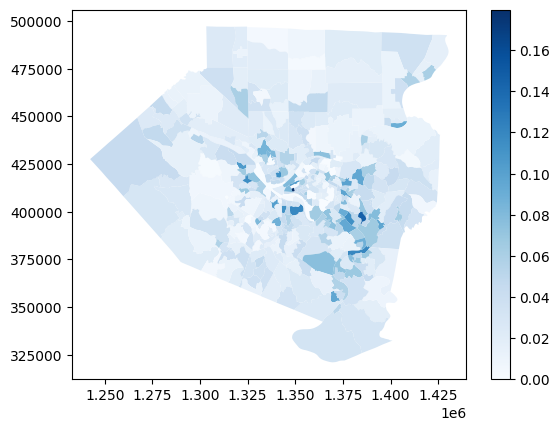

In [7]:
homes.plot(column='unemployment_rate', cmap='Blues', legend=True)

Disability 2020 census tract data (satisfies disabled population transit-dependence group)

In [8]:
df = pd.read_csv('disability_data.csv')
df.columns = list(df.iloc[0])
df = df[2:]

df = df[['Geographic Area Name',
         'Estimate!!Total!!Total civilian noninstitutionalized population',
         'Margin of Error!!Total!!Total civilian noninstitutionalized population',
         'Estimate!!With a disability!!Total civilian noninstitutionalized population',
         'Margin of Error!!With a disability!!Total civilian noninstitutionalized population']]

df.columns = ['Geographic Area Name', 'noninst_population', 'noninst_margoferr',
              'disabled_noninstitutionalized_population',
              'disabled_noninstitutionalized_margoferr']

df['NAME'] = df['Geographic Area Name'].apply(lambda x: x.split(',')[0].split(' ')[-1])
homes = pd.merge(left=homes, right=df.drop(columns=['Geographic Area Name']), on='NAME')

def disab_rate(row):
  try:
    return int(row['disabled_noninstitutionalized_population']) / int(row['noninst_population'])
  except:
    return 0.0
homes['disability_rate'] = homes.apply(lambda x: disab_rate(x), axis=1)

In [9]:
homes

,FID,STATEFP,COUNTYFP,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,unemp_sample_population,unemp_sample_margoferr,unemployed_population,unemployed_margoferr,unemployment_rate,noninst_population,noninst_margoferr,disabled_noninstitutionalized_population,disabled_noninstitutionalized_margoferr,disability_rate
0,1,42,003,42003565300,1400000US42003565300,5653,Census Tract 5653,G5020,S,6565373,...,975,206,26,22,0.026667,1256,366,212,56,0.168790
1,2,42,003,42003458002,1400000US42003458002,4580.02,Census Tract 4580.02,G5020,S,17643972,...,3580,313,32,35,0.008939,4208,325,653,197,0.155181
2,3,42,003,42003458001,1400000US42003458001,4580.01,Census Tract 4580.01,G5020,S,17615721,...,3388,281,119,111,0.035124,3965,327,309,145,0.077932
3,4,42,003,42003101900,1400000US42003101900,1019,Census Tract 1019,G5020,S,857102,...,1858,264,65,47,0.034984,2382,332,389,112,0.163308
4,5,42,003,42003120900,1400000US42003120900,1209,Census Tract 1209,G5020,S,1153119,...,1229,172,89,40,0.072417,1432,201,253,134,0.176676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,42,003,42003475301,1400000US42003475301,4753.01,Census Tract 4753.01,G5020,S,3387769,...,3942,752,144,75,0.036530,4642,838,621,289,0.133779
390,391,42,003,42003495000,1400000US42003495000,4950,Census Tract 4950,G5020,S,49019304,...,2921,120,95,54,0.032523,3290,15,701,249,0.213070
391,392,42,003,42003521302,1400000US42003521302,5213.02,Census Tract 5213.02,G5020,S,7972525,...,3611,457,155,102,0.042924,4170,639,649,236,0.155635
392,393,42,003,42003523701,1400000US42003523701,5237.01,Census Tract 5237.01,G5020,S,6548443,...,3279,414,99,85,0.030192,4026,471,612,157,0.152012


<Axes: >

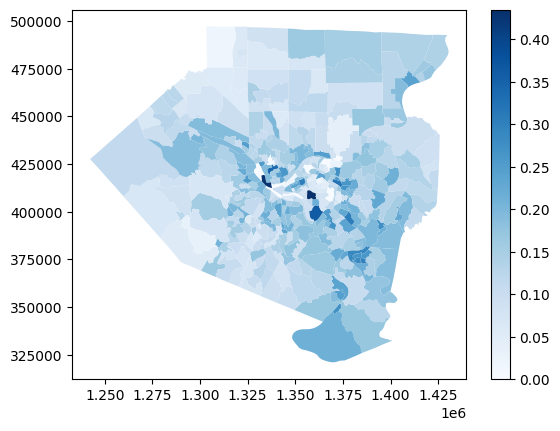

In [10]:
homes.plot(column='disability_rate', cmap='Blues', legend=True)

Poverty 2020 Census tract data (satisfies population below poverty level transit-dependence group)

In [11]:
df = pd.read_csv('poverty_data.csv')
df.columns = list(df.iloc[0])
df = df[2:]

df = df[['Geographic Area Name',
         'Estimate!!Total!!Population for whom poverty status is determined',
         'Margin of Error!!Total!!Population for whom poverty status is determined',
         'Estimate!!Below poverty level!!Population for whom poverty status is determined',
         'Margin of Error!!Below poverty level!!Population for whom poverty status is determined']]

df.columns = ['Geographic Area Name', 'pov_sample_population', 'pov_sample_margoferr',
              'population_below_poverty', 'below_poverty_margoferr']

df['NAME'] = df['Geographic Area Name'].apply(lambda x: x.split(',')[0].split(' ')[-1])
homes = pd.merge(left=homes, right=df.drop(columns=['Geographic Area Name']), on='NAME')

def poverty_rate(row):
  try:
    return int(row['population_below_poverty']) / int(row['pov_sample_population'])
  except:
    return 0.0
homes['poverty_rate'] = homes.apply(lambda x: poverty_rate(x), axis=1)

In [12]:
homes

,FID,STATEFP,COUNTYFP,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,noninst_population,noninst_margoferr,disabled_noninstitutionalized_population,disabled_noninstitutionalized_margoferr,disability_rate,pov_sample_population,pov_sample_margoferr,population_below_poverty,below_poverty_margoferr,poverty_rate
0,1,42,003,42003565300,1400000US42003565300,5653,Census Tract 5653,G5020,S,6565373,...,1256,366,212,56,0.168790,1256,366,339,353,0.269904
1,2,42,003,42003458002,1400000US42003458002,4580.02,Census Tract 4580.02,G5020,S,17643972,...,4208,325,653,197,0.155181,4208,325,109,88,0.025903
2,3,42,003,42003458001,1400000US42003458001,4580.01,Census Tract 4580.01,G5020,S,17615721,...,3965,327,309,145,0.077932,3979,326,176,110,0.044232
3,4,42,003,42003101900,1400000US42003101900,1019,Census Tract 1019,G5020,S,857102,...,2382,332,389,112,0.163308,2382,332,677,302,0.284215
4,5,42,003,42003120900,1400000US42003120900,1209,Census Tract 1209,G5020,S,1153119,...,1432,201,253,134,0.176676,1432,201,608,207,0.424581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,42,003,42003475301,1400000US42003475301,4753.01,Census Tract 4753.01,G5020,S,3387769,...,4642,838,621,289,0.133779,4642,838,169,117,0.036407
390,391,42,003,42003495000,1400000US42003495000,4950,Census Tract 4950,G5020,S,49019304,...,3290,15,701,249,0.213070,3290,15,126,61,0.038298
391,392,42,003,42003521302,1400000US42003521302,5213.02,Census Tract 5213.02,G5020,S,7972525,...,4170,639,649,236,0.155635,4170,639,255,141,0.061151
392,393,42,003,42003523701,1400000US42003523701,5237.01,Census Tract 5237.01,G5020,S,6548443,...,4026,471,612,157,0.152012,4026,471,477,286,0.118480


<Axes: >

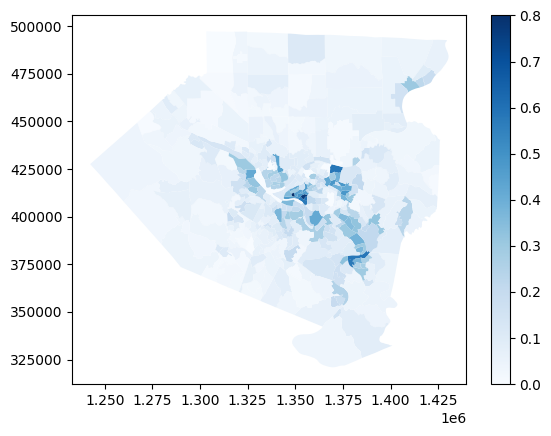

In [13]:
homes.plot(column='poverty_rate', cmap='Blues', legend=True)

Demographic 2020 Census tract data (satisfies the non-white transit-dependency group--need to look at sources on this one because Wei et. Al calls this a transit dependent group, but need to check Wei et. Al's sources on this claim, as it could come off as a racist stereotype. Would be looking for source that talks about how minorities are statistically significantly more transit dependent than white populations)

In [14]:
df = pd.read_csv('demographic_data.csv')
df.columns = list(df.iloc[0])
df = df[2:]

df = df[['Geographic Area Name',
         'Estimate!!RACE!!Total population',
         'Margin of Error!!RACE!!Total population',
         'Estimate!!RACE!!Total population!!One race!!White',
         'Margin of Error!!RACE!!Total population!!One race!!White']]

df.columns = ['Geographic Area Name', 'race_population', 'race_margoferr',
              'white_population', 'white_margoferr']

# Classifies 'non-white population' as anyone that did not identify as 'One Race: White'
df['nonwhite_population'] = df['race_population'].astype(int) - df['white_population'].astype(int)

df['NAME'] = df['Geographic Area Name'].apply(lambda x: x.split(',')[0].split(' ')[-1])
homes = pd.merge(left=homes, right=df.drop(columns=['Geographic Area Name']), on='NAME')

def percent_nonwhite(row):
  try:
    return 1 - int(row['white_population']) / int(row['race_population'])
  except:
    return 0.0
homes['percent_nonwhite'] = homes.apply(lambda x: percent_nonwhite(x), axis=1)

<Axes: >

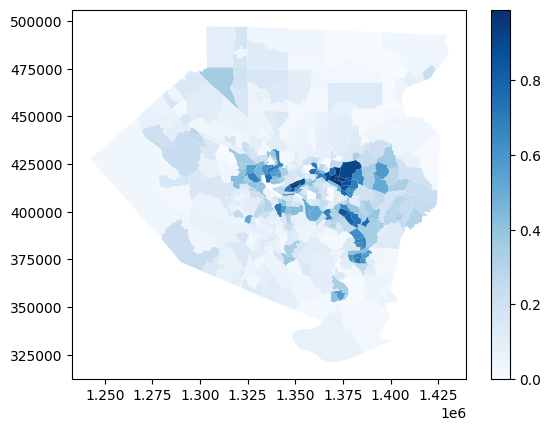

In [15]:
homes.plot(column='percent_nonwhite', cmap='Blues', legend=True)